Week 3, Assignment C1:

OLS Linear Regression in Python

In this notebook, we will perform an OLS linear regression in Python.
Please complete the lines bellow where you see "# TODO".

In [3]:
#Objective 1.
#Use this cell to import all three of the Pandas (as pd), Numpy (as np), and Pyplot (from Matplotlib as plt) 
#packages.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [4]:
np.random.seed(0)
x = 3.0 * np.random.randn(100) + 2.0
res = 0.5 * np.random.randn(100)
y = 1.5 + 0.45 * x + res 
#Objective 2.
#Create a Pandas DataFrame to store the values of x and y generated by the commands appearing above, and examine
#the first five rows of the DataFrame.
df = pd.DataFrame({'x': x , 'y': y})
print(df)

           x         y
0   7.292157  5.723046
1   3.200472  2.266333
2   4.936214  3.086054
3   8.722680  5.909904
4   7.602674  4.334642
..       ...       ...
95  4.119720  3.268101
96  2.031500  2.800070
97  7.357611  5.222677
98  2.380736  3.652949
99  3.205968  3.610950

[100 rows x 2 columns]


In [5]:
#Objective 3.
#Calculate the means of both x and y, and print them as output.
x_bar = np.mean(df['x'])
y_bar = np.mean(df['y'])
print(x_bar)
print(y_bar)

2.1794240466034545
2.521747306345473


In [6]:
#Objective 4.
#Add a column called 'x_var' to the DataFrame.  Populate this column with the squares of the deviations of the
#x values from their mean (x_bar).
df['x_var'] = (df['x'] - x_bar)**2
print(df)

           x         y      x_var
0   7.292157  5.723046  26.140039
1   3.200472  2.266333   1.042538
2   4.936214  3.086054   7.599891
3   8.722680  5.909904  42.814193
4   7.602674  4.334642  29.411640
..       ...       ...        ...
95  4.119720  3.268101   3.764746
96  2.031500  2.800070   0.021882
97  7.357611  5.222677  26.813625
98  2.380736  3.652949   0.040527
99  3.205968  3.610950   1.053793

[100 rows x 3 columns]


In [7]:
#Objective 5.
#Add a column called 'xy_cov' to the DataFrame.  Populate this column with the products of the deviations of the
#x values from their mean (x_bar) and the deviations of the y values from their mean (y_bar):
#(x - x_bar)(y - y_bar).
df['xy_cov'] = (df['x'] - x_bar) * (df['y'] - y_bar)
print(df)

           x         y      x_var     xy_cov
0   7.292157  5.723046  26.140039  16.367386
1   3.200472  2.266333   1.042538  -0.260790
2   4.936214  3.086054   7.599891   1.555674
3   8.722680  5.909904  42.814193  22.169576
4   7.602674  4.334642  29.411640   9.831779
..       ...       ...        ...        ...
95  4.119720  3.268101   3.764746   1.448146
96  2.031500  2.800070   0.021882  -0.041171
97  7.357611  5.222677  26.813625  13.985921
98  2.380736  3.652949   0.040527   0.227725
99  3.205968  3.610950   1.053793   1.118114

[100 rows x 4 columns]


In [8]:
#Objective 6.
#Use the values currently stored in the DataFrame to calculate the OLS Linear Regression coefficients
# We want to take the sum of our collumn 'xy_cov' and divide it by the sum of 'x_var'
#alpha and beta, and print them as output.

beta = df['xy_cov'].sum() / df['x_var'].sum()
alpha = y_bar - beta * x_bar
print(alpha)
print(beta)

1.49934373134413
0.4691164055910635


In [9]:
#Objective 7.
#Make a new vector of values called y_pred containing a predicted y value for each actual y value in the DataFrame.
# y_pred = a + BX

y_pred = alpha + beta*df['x'] 
print(y_pred)
df['y_pred']=y_pred
print(df)

0     4.920214
1     3.000737
2     3.815003
3     5.591296
4     5.065883
        ...   
95    3.431972
96    2.452354
97    4.950920
98    2.616186
99    3.003316
Name: x, Length: 100, dtype: float64
           x         y      x_var     xy_cov    y_pred
0   7.292157  5.723046  26.140039  16.367386  4.920214
1   3.200472  2.266333   1.042538  -0.260790  3.000737
2   4.936214  3.086054   7.599891   1.555674  3.815003
3   8.722680  5.909904  42.814193  22.169576  5.591296
4   7.602674  4.334642  29.411640   9.831779  5.065883
..       ...       ...        ...        ...       ...
95  4.119720  3.268101   3.764746   1.448146  3.431972
96  2.031500  2.800070   0.021882  -0.041171  2.452354
97  7.357611  5.222677  26.813625  13.985921  4.950920
98  2.380736  3.652949   0.040527   0.227725  2.616186
99  3.205968  3.610950   1.053793   1.118114  3.003316

[100 rows x 5 columns]


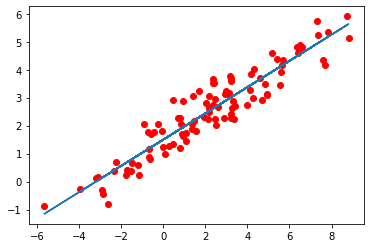

In [10]:
#Objective 8.
#Plot the predicted values of y (y_pred) against the actual values of y.  Make the actual values of y red in color.
plt.scatter(df['x'], df['y'], color='r')
plt.plot(df['x'], df['y_pred'])
plt.show()